In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Training_DU_Clustering70.csv", skipinitialspace=True, sep=',')
df

,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,VehBCost,WarrantyCost,TransmissionID,NationalityID
0,2001,8,1.0,55117,3192.0,3947.0,3192.0,3947.0,4315.0,1054,0,0
1,2006,3,1.0,72728,12423.0,13917.0,13721.0,15319.0,10835.0,920,0,0
2,2006,3,1.0,80650,13271.0,14833.0,12982.0,18542.0,11515.0,983,0,0
3,2002,8,1.0,87788,5286.0,8768.0,5503.0,8901.0,9110.0,1283,0,0
4,2002,7,1.0,58350,5617.0,6566.0,5617.0,6566.0,6455.0,1054,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35672,2006,4,1.0,73564,10289.0,14907.0,9284.0,13919.0,8315.0,1272,0,0
35673,2006,4,1.0,80855,10120.0,14618.0,10795.0,14669.0,10115.0,1373,0,0
35674,2006,4,1.0,82286,12341.0,16405.0,13115.0,16693.0,8675.0,1373,0,0
35675,2006,3,1.0,68976,13765.0,15366.0,13981.0,15599.0,9215.0,1118,0,0


In [3]:
Final_df = pd.read_csv("Training_DU_Clustering_forAnalysis70.csv", skipinitialspace=True, sep=',')
Final_df

,PurchDate,Model,SubModel,VehYear,RefId,IsBadBuy,Auction,VehicleAge,Make,Engine,...,MMRCurrentRetailAveragePrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Doors,TransmissionID,NationalityID
0,2009-07-28,1500 RAM,EXT CAB,2001,61608,1,ADESA,8,DODGE,5.2L,...,3947.0,23359,91752,CA,4315.0,0,1054,4D,0,0
1,2009-02-25,1500 RAM,MEGA CAB,2006,50261,0,MANHEIM,3,DODGE,5.7L,...,15319.0,19662,78219,TX,10835.0,0,920,NaN,0,0
2,2009-01-12,1500 RAM,MEGA CAB,2006,33703,0,MANHEIM,3,DODGE,5.7L,...,18542.0,19619,34761,FL,11515.0,0,983,NaN,0,0
3,2010-12-08,1500 RAM,QUAD CAB,2002,23228,1,MANHEIM,8,DODGE,4.7L,...,8901.0,18880,29532,SC,9110.0,0,1283,NaN,0,0
4,2009-07-31,1500 RAM,QUAD CAB,2002,60207,1,ADESA,7,DODGE,5.9L,...,6566.0,18881,37771,TN,6455.0,0,1054,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35672,2010-10-11,ZEPHYR,SEDAN,2006,64639,0,ADESA,4,LINCOLN,NaN,...,13919.0,21053,85226,AZ,8315.0,0,1272,4D,0,0
35673,2010-11-23,ZEPHYR,SEDAN,2006,9964,0,MANHEIM,4,LINCOLN,NaN,...,14669.0,52646,21075,MD,10115.0,0,1373,4D,0,0
35674,2010-02-18,ZEPHYR,SEDAN,2006,25215,0,OTHER,4,LINCOLN,NaN,...,16693.0,3453,80229,CO,8675.0,0,1373,4D,0,0
35675,2009-03-03,ZEPHYR,SEDAN,2006,32556,0,MANHEIM,3,LINCOLN,NaN,...,15599.0,3453,80022,CO,9215.0,0,1118,4D,0,0


# Inizio Analisi 

In [4]:
columns=['VehicleAge','VehOdo','VehBCost']
pdf=df[columns]
pdf.head()

,VehicleAge,VehOdo,VehBCost
0,8,55117,4315.0
1,3,72728,10835.0
2,3,80650,11515.0
3,8,87788,9110.0
4,7,58350,6455.0


## Normalization

In [5]:
scaler = StandardScaler()
scaler.fit(pdf.head().values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
X = scaler.fit_transform(pdf.values)

In [7]:
X[:5]

array([[ 2.19866922, -1.09637652, -1.32029031],
       [-0.67442972,  0.10734225,  2.32867295],
       [-0.67442972,  0.64881407,  2.70923967],
       [ 2.19866922,  1.13669917,  1.36326472],
       [ 1.62404944, -0.8753997 , -0.12262446]])

Knee Method to estimate the best K

In [9]:
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=20, max_iter=150)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

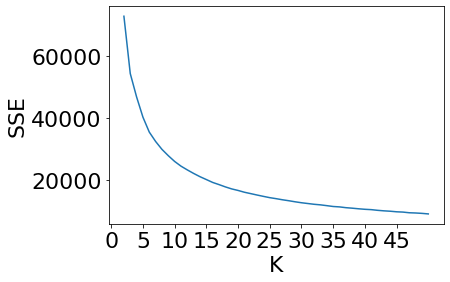

In [10]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

## Prima analisi K=12

In [11]:
kmeans = KMeans(n_clusters=12, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=12, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 2787,
 1: 3198,
 2: 2634,
 3: 4015,
 4: 3202,
 5: 1934,
 6: 2899,
 7: 1475,
 8: 4554,
 9: 3225,
 10: 2899,
 11: 2855}

Two dimention view

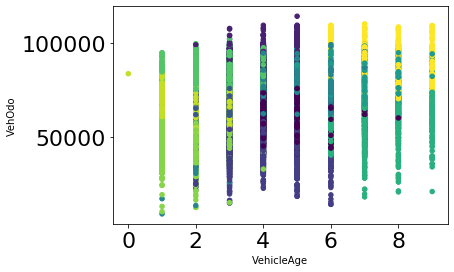

In [13]:
plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

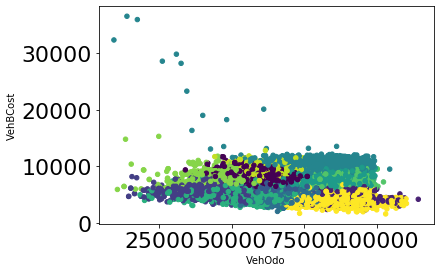

In [14]:
plt.scatter(pdf['VehOdo'], pdf['VehBCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

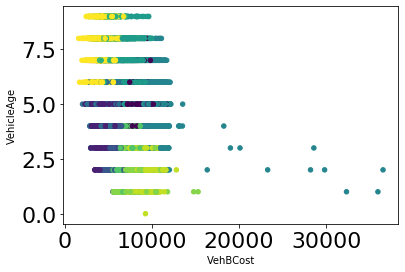

In [15]:
plt.scatter(pdf['VehBCost'], pdf['VehicleAge'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('VehicleAge')
plt.show()

Centroids

In [16]:
kmeans.cluster_centers_

array([[ 0.27522896, -0.4585812 ,  0.75187917],
       [ 0.02993714,  1.04712933, -0.96647989],
       [-0.19427096, -1.57347049, -0.53122672],
       [-0.57612818, -0.23585658, -0.33552305],
       [ 0.48324432, -0.05373819, -0.96507324],
       [ 0.30596142,  0.62136903,  1.95537559],
       [ 1.03555951,  0.80180275,  0.46533385],
       [ 1.64739215, -0.86290394, -0.76774295],
       [-0.62094151,  0.78035097,  0.43583177],
       [-1.39582545, -1.55181549,  0.4323059 ],
       [-1.02221547, -0.17962834,  1.083916  ],
       [ 1.63531255,  1.01565352, -1.28823952]])

Two dimentional view with the centroids

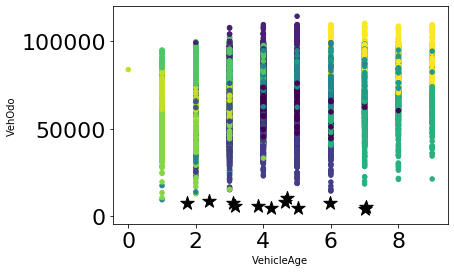

In [17]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

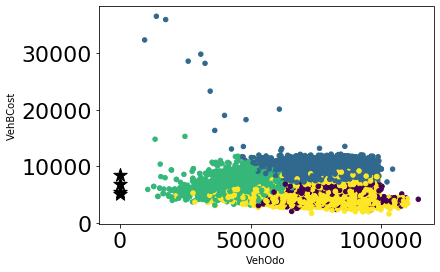

In [88]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehOdo'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

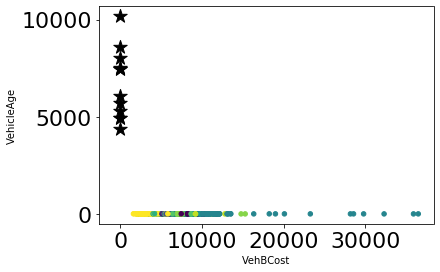

In [19]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehBCost'], pdf['VehicleAge'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('VehicleAge')
plt.show()

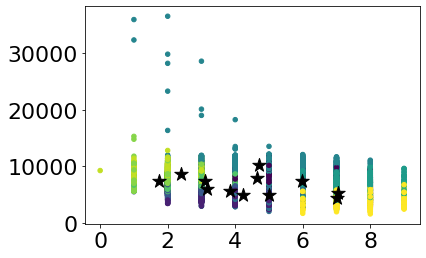

In [20]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Visualization of clusters centers by means of parallel coordinates

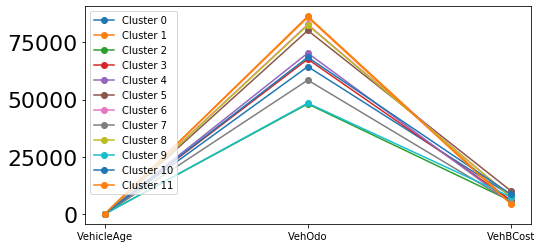

In [21]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(pdf.columns)), pdf.columns, fontsize=10)
plt.legend(fontsize=10)
plt.show()

SSE and Clustering Validation

In [22]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 23256.32453891192
Silhouette 0.2549543212989049


## Seconda analisi K=10

In [23]:
kmeans = KMeans(n_clusters=10, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=10, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
kmeans.labels_[:5]

array([7, 4, 4, 5, 7])

In [25]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([5576, 4215, 4148, 2462, 2167, 3609, 3883, 3179, 3240, 3198],
       dtype=int64))

In [26]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 5576,
 1: 4215,
 2: 4148,
 3: 2462,
 4: 2167,
 5: 3609,
 6: 3883,
 7: 3179,
 8: 3240,
 9: 3198}

Two dimention view

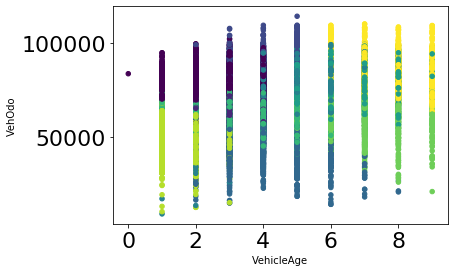

In [27]:
plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

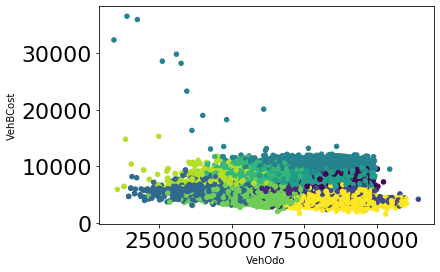

In [28]:
plt.scatter(pdf['VehOdo'], pdf['VehBCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

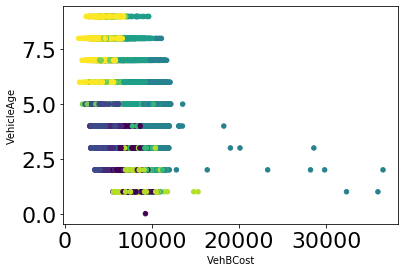

In [29]:
plt.scatter(pdf['VehBCost'], pdf['VehicleAge'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('VehicleAge')
plt.show()

Centroids

In [30]:
kmeans.cluster_centers_

array([[-0.72689276,  0.67252876,  0.5062896 ],
       [-0.47907534, -0.26846202, -0.51999893],
       [ 0.09163765,  0.89628597, -0.95695645],
       [-0.17184137, -1.6701806 , -0.46736746],
       [ 0.22024826,  0.54791886,  1.94777918],
       [ 0.94705211,  0.60858561,  0.50928801],
       [-0.440254  , -0.51136293,  0.90482517],
       [ 1.07401231, -0.55928012, -0.79045117],
       [-1.43858007, -1.51201917,  0.43891351],
       [ 1.61865901,  0.95667918, -1.2458513 ]])

Two dimentional view with the centroids

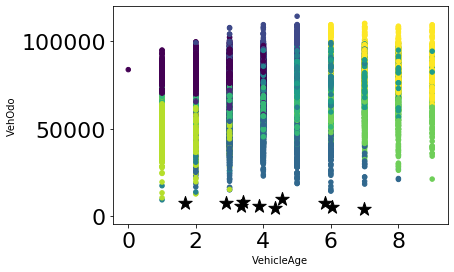

In [31]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

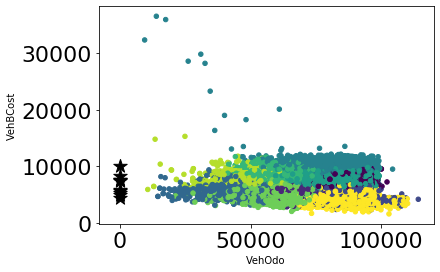

In [32]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehOdo'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

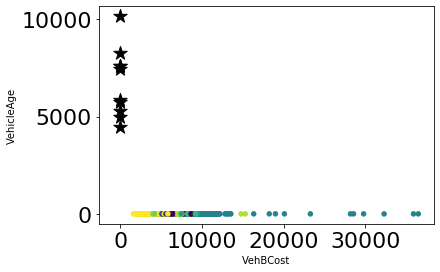

In [33]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehBCost'], pdf['VehicleAge'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('VehicleAge')
plt.show()

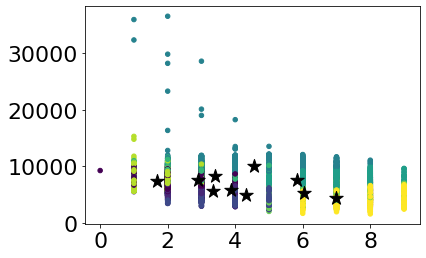

In [34]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Visualization of clusters centers by means of parallel coordinates

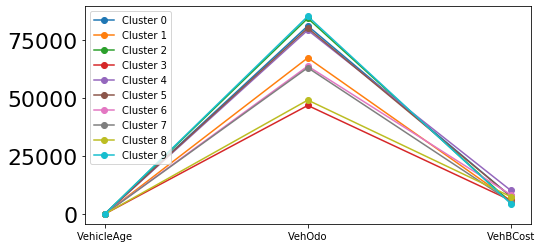

In [35]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(pdf.columns)), pdf.columns, fontsize=10)
plt.legend(fontsize=10)
plt.show()

SSE and Clustering Validation

In [36]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 25984.576162707508
Silhouette 0.25781173327973816


## Terza analisi K=7

In [37]:
kmeans = KMeans(n_clusters=7, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=7, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 5678, 1: 5752, 2: 4083, 3: 3048, 4: 4387, 5: 4952, 6: 7777}

Two dimention view

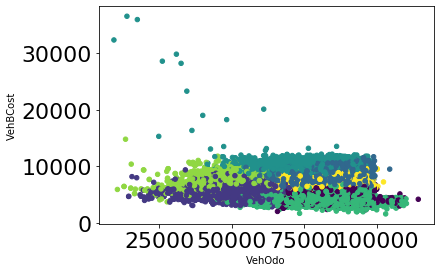

In [39]:
plt.scatter(pdf['VehOdo'], pdf['VehBCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

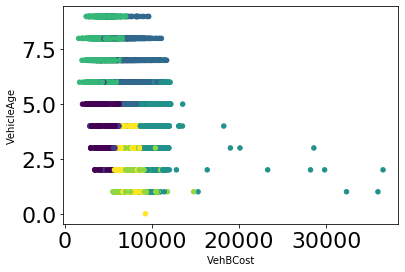

In [40]:
plt.scatter(pdf['VehBCost'], pdf['VehicleAge'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('VehicleAge')
plt.show()

Centroids

In [41]:
kmeans.cluster_centers_

array([[ 0.01855365,  0.69358047, -0.90576192],
       [ 0.19099643, -0.97873232, -0.52972273],
       [ 0.9357995 ,  0.60717155,  0.71937927],
       [-0.2367679 ,  0.05188728,  1.76735424],
       [ 1.59052558,  0.65541553, -1.15612404],
       [-1.20098068, -1.42515874,  0.3389637 ],
       [-0.68699213,  0.41516549,  0.41981598]])

Two dimentional view with the centroids

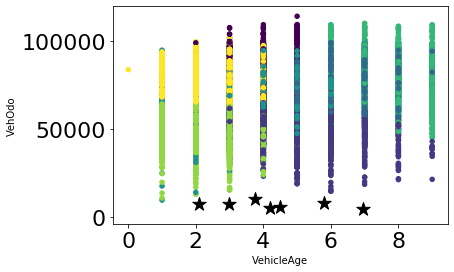

In [42]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

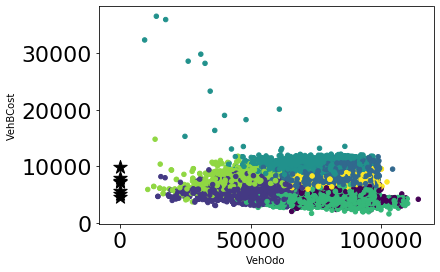

In [43]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehOdo'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

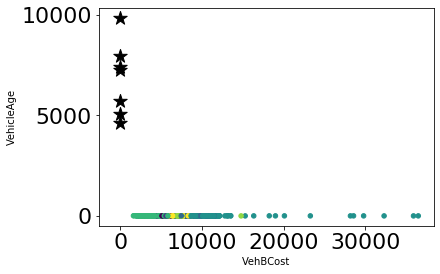

In [44]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehBCost'], pdf['VehicleAge'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('VehicleAge')
plt.show()

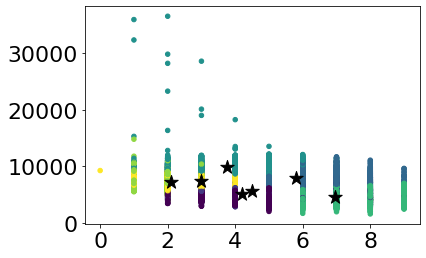

In [46]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Visualization of clusters centers by means of parallel coordinates

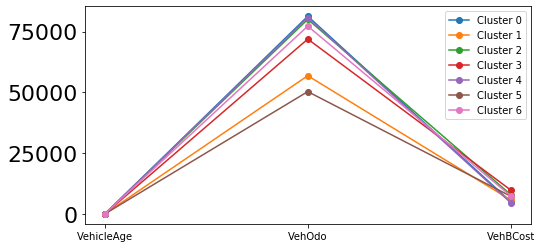

In [47]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(pdf.columns)), pdf.columns, fontsize=10)
plt.legend(fontsize=10)
plt.show()

SSE and Clustering Validation

In [48]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 32420.491485058945
Silhouette 0.26752865021278527


## Quarta analisi K=6

In [49]:
kmeans = KMeans(n_clusters=6, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=6, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 5920, 1: 4860, 2: 8246, 3: 6705, 4: 5066, 5: 4880}

Two dimention view

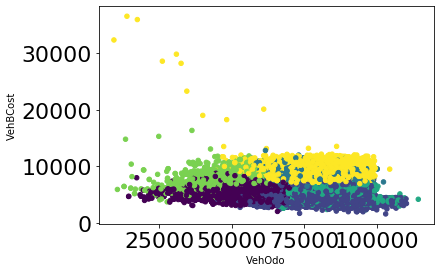

In [51]:
plt.scatter(pdf['VehOdo'], pdf['VehBCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

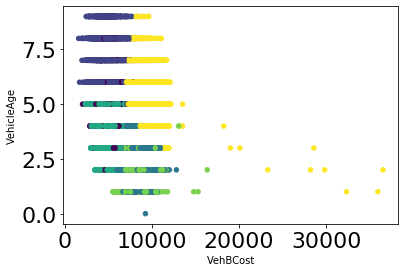

In [52]:
plt.scatter(pdf['VehBCost'], pdf['VehicleAge'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('VehicleAge')
plt.show()

Centroids

In [53]:
kmeans.cluster_centers_

array([[ 0.19715622, -0.94790315, -0.54752459],
       [ 1.57818388,  0.66387089, -1.03137804],
       [-0.72522368,  0.30968336,  0.66661972],
       [-0.0214098 ,  0.70086254, -0.76945617],
       [-1.17442945, -1.43301859,  0.38095732],
       [ 0.6628972 ,  0.49109514,  1.22533493]])

Two dimentional view with the centroids

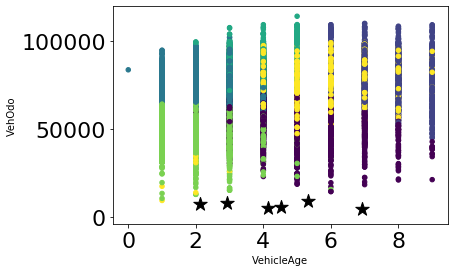

In [54]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

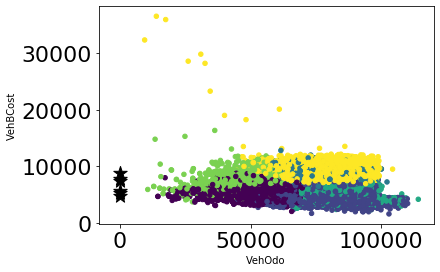

In [55]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehOdo'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

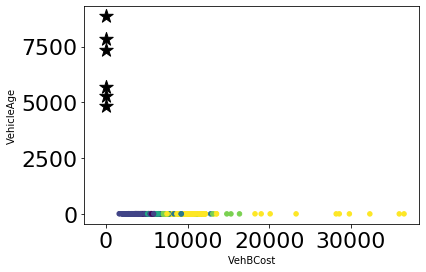

In [56]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehBCost'], pdf['VehicleAge'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('VehicleAge')
plt.show()

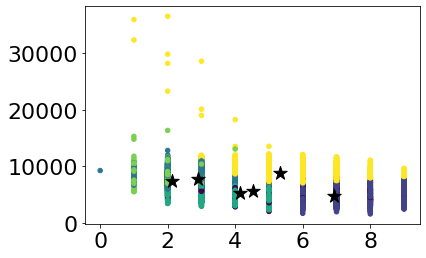

In [57]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Visualization of clusters centers by means of parallel coordinates

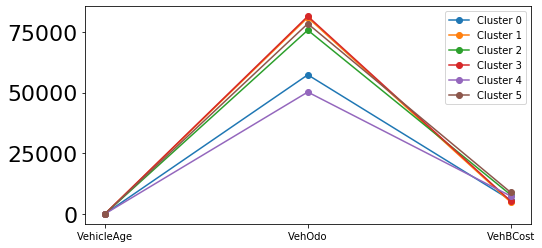

In [58]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(pdf.columns)), pdf.columns, fontsize=10)
plt.legend(fontsize=10)
plt.show()

SSE and Clustering Validation

In [59]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 35449.860148558015
Silhouette 0.2649133035662797


## Quinta analisi K=5 

In [60]:
kmeans = KMeans(n_clusters=5, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=5, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [61]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 9484, 1: 7519, 2: 6132, 3: 6439, 4: 6103}

Two dimention view

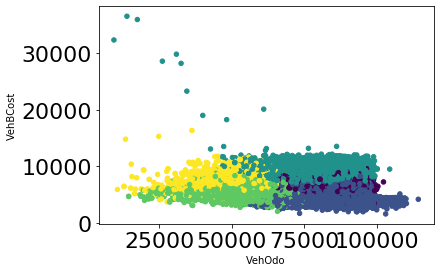

In [62]:
plt.scatter(pdf['VehOdo'], pdf['VehBCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

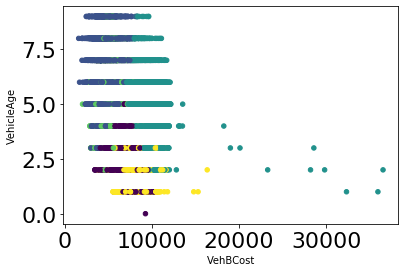

In [63]:
plt.scatter(pdf['VehBCost'], pdf['VehicleAge'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('VehicleAge')
plt.show()

Centroids

In [64]:
kmeans.cluster_centers_

array([[-0.61106768,  0.49943459,  0.14281361],
       [ 1.10971086,  0.80469369, -1.0238252 ],
       [ 0.37332368,  0.40847289,  1.29534404],
       [ 0.29365642, -0.81480682, -0.63566348],
       [-1.10271074, -1.31930464,  0.40864304]])

Two dimentional view with the centroids

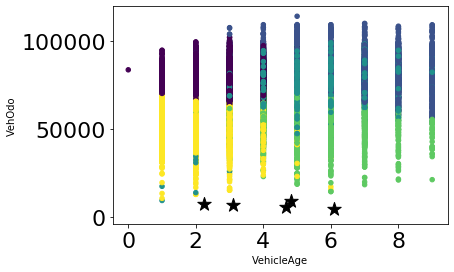

In [65]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

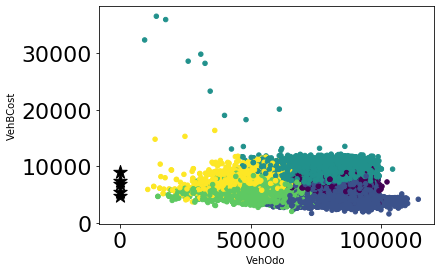

In [66]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehOdo'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

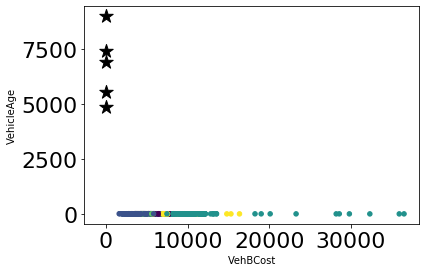

In [67]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehBCost'], pdf['VehicleAge'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('VehicleAge')
plt.show()

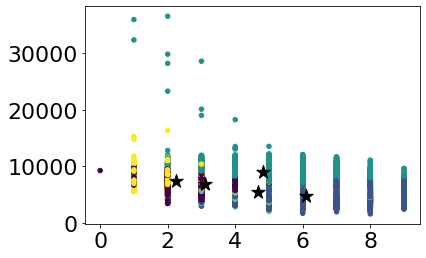

In [69]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Visualization of clusters centers by means of parallel coordinates

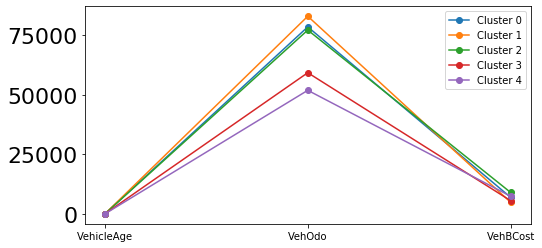

In [70]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(pdf.columns)), pdf.columns, fontsize=10)
plt.legend(fontsize=10)
plt.show()

SSE and Clustering Validation

In [71]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 40258.69323234477
Silhouette 0.2699055870638281


## Sesta analisi K=3

In [72]:
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [73]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 10294, 1: 12063, 2: 13320}

Two dimention view

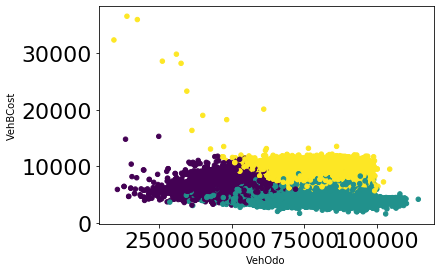

In [74]:
plt.scatter(pdf['VehOdo'], pdf['VehBCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

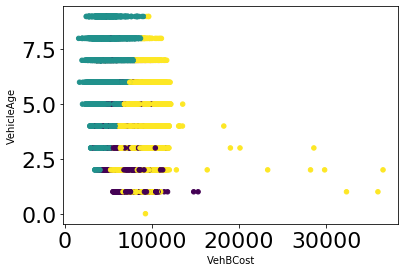

In [75]:
plt.scatter(pdf['VehBCost'], pdf['VehicleAge'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('VehicleAge')
plt.show()

Centroids

In [76]:
kmeans.cluster_centers_

array([[-6.89328093e-01, -1.16854168e+00,  6.52531951e-04],
       [ 8.53471522e-01,  4.96430052e-01, -8.97939502e-01],
       [-2.39163959e-01,  4.54015702e-01,  8.11529010e-01]])

Two dimentional view with the centroids

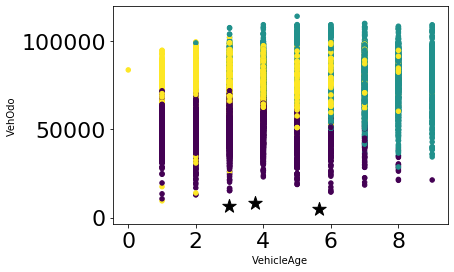

In [77]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

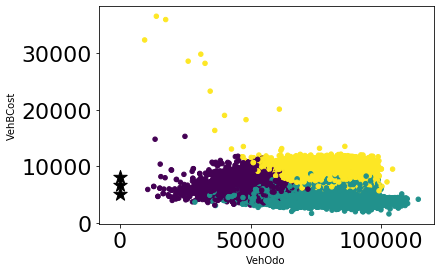

In [78]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehOdo'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

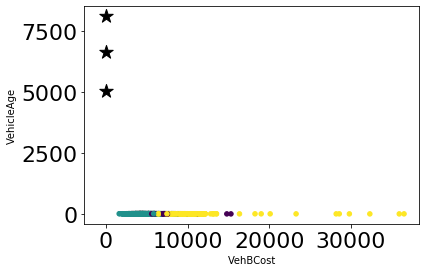

In [79]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehBCost'], pdf['VehicleAge'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('VehicleAge')
plt.show()

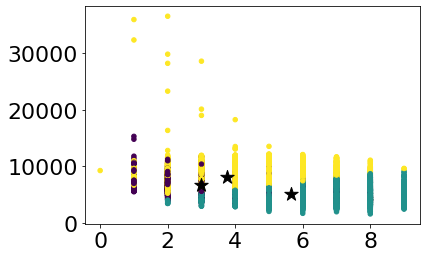

In [80]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Visualization of clusters centers by means of parallel coordinates

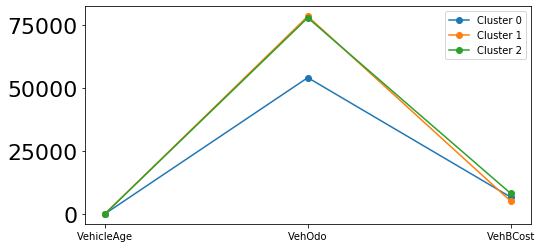

In [81]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(pdf.columns)), pdf.columns, fontsize=10)
plt.legend(fontsize=10)
plt.show()

SSE and Clustering Validation

In [82]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 54323.09338484397
Silhouette 0.2959054935433177


## Comparison of the results of the different K

### K=12 BEST Sum of Squared Error
SSE 23256.32453891192

Silhouette 0.2549543212989049

### K=10
SSE 25984.576162707508

Silhouette 0.25781173327973816

### K=7 BEST Combination
SSE 32420.491485058945

Silhouette 0.26752865021278527

### K=6 
SSE 35449.860148558015

Silhouette 0.2649133035662797

### K=5 
SSE 40258.69323234477

Silhouette 0.2699055870638281

### K=3 BEST Silhouette
SSE 54323.09338484397

Silhouette 0.2959054935433177

### Other fast tests with other values of K

In [83]:
kmeans = KMeans(n_clusters=8, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=8, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [84]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 29876.741983624728
Silhouette 0.26033433215922075


In [85]:
kmeans = KMeans(n_clusters=4, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [86]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 46771.87780132258
Silhouette 0.2639396977520294
